In [729]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## TRAIN DATASET

In [730]:
train=pd.read_csv(r"C:\Users\johne\OneDrive\Desktop\Virtual Competition\train_ctrUa4K.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [731]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Creating a copy of the dataset and filling in all of the missing values using median and mode functions

In [732]:
tt=train.copy()
tt.drop('Loan_ID',axis=1,inplace=True)

In [733]:
tt['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [734]:
tt['Gender']=tt['Gender'].fillna('Male')
tt['Gender'].isna().sum()

0

In [735]:
tt['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [736]:
tt['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [737]:
tt['Married']=tt['Married'].fillna('Yes')
tt['Married'].isna().sum()

0

In [738]:
tt['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [739]:
tt['Dependents']=tt['Dependents'].fillna('0')
tt['Dependents'].isna().sum()

0

In [740]:
tt['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [741]:
tt['Self_Employed']=tt['Self_Employed'].fillna('No')
tt['Self_Employed'].isna().sum()

0

In [742]:
tt['LoanAmount'].nunique()

203

In [743]:
tt['LoanAmount'].skew()

2.677551679256059

In [744]:
tt['LoanAmount']=tt['LoanAmount'].fillna(tt['LoanAmount'].median())
tt['LoanAmount'].isna().sum()

0

In [745]:
tt['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [746]:
tt['Loan_Amount_Term']=tt['Loan_Amount_Term'].fillna(360.0)
tt['Loan_Amount_Term'].isna().sum()

0

In [747]:
tt['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [748]:
tt['Credit_History']=tt['Credit_History'].fillna(1.0)
tt['Credit_History'].isna().sum()

0

In [749]:
tt['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [750]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [751]:
tt

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


###  Viewing boxplots of various variables to find the outliers and then handling them using the clip method

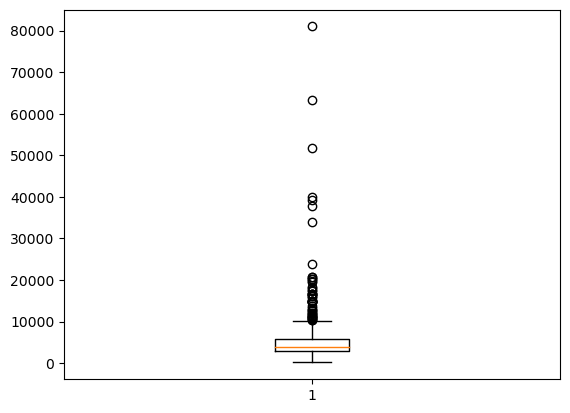

In [752]:
plt.boxplot(tt['ApplicantIncome'])
plt.show()

In [753]:
Q1=np.percentile(tt['ApplicantIncome'],25,method='midpoint')
Q2=np.percentile(tt['ApplicantIncome'],50,method='midpoint')
Q3=np.percentile(tt['ApplicantIncome'],75,method='midpoint')

print('Q1 is: ',Q1)
print('Q2 is: ',Q2)
print('Q3 is: ',Q3)

Q1 is:  2879.0
Q2 is:  3812.5
Q3 is:  5790.0


In [754]:
IQR=Q3-Q1
print(IQR)

2911.0


In [755]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('Lower value: ',low_lim)
print('Upper value: ',up_lim)

Lower value:  -1487.5
Upper value:  10156.5


In [756]:
outliers=[]

for i in tt['ApplicantIncome']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)
        
print(outliers)        

[12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]


In [757]:
tt['ApplicantIncome']=tt['ApplicantIncome'].clip(lower=low_lim,upper=up_lim)

In [758]:
outliers=[]

for i in tt['ApplicantIncome']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)
        
print(outliers)    

[]


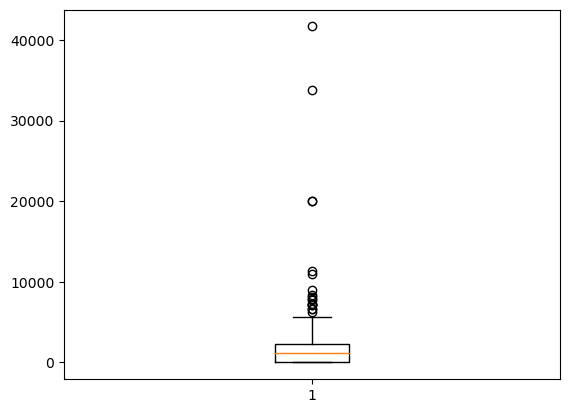

In [759]:
plt.boxplot(tt['CoapplicantIncome'])
plt.show()

In [760]:
Q1=np.percentile(tt['CoapplicantIncome'],25,method='midpoint')
Q2=np.percentile(tt['CoapplicantIncome'],50,method='midpoint')
Q3=np.percentile(tt['CoapplicantIncome'],75,method='midpoint')

print('Q1 is: ',Q1)
print('Q2 is: ',Q2)
print('Q3 is: ',Q3)

Q1 is:  0.0
Q2 is:  1188.5
Q3 is:  2292.5


In [761]:
IQR=Q3-Q1
print(IQR)

2292.5


In [762]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('Lower value: ',low_lim)
print('Upper value: ',up_lim)

Lower value:  -3438.75
Upper value:  5731.25


In [763]:
outliers=[]

for i in tt['CoapplicantIncome']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)
        
print(outliers)        

[10968.0, 8106.0, 7210.0, 8980.0, 7750.0, 11300.0, 7250.0, 7101.0, 6250.0, 7873.0, 20000.0, 20000.0, 8333.0, 6667.0, 6666.0, 7166.0, 33837.0, 41667.0]


In [764]:
tt['CoapplicantIncome']=tt['CoapplicantIncome'].clip(lower=low_lim,upper=up_lim)

In [765]:
outliers=[]

for i in tt['CoapplicantIncome']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)
        
print(outliers)     

[]


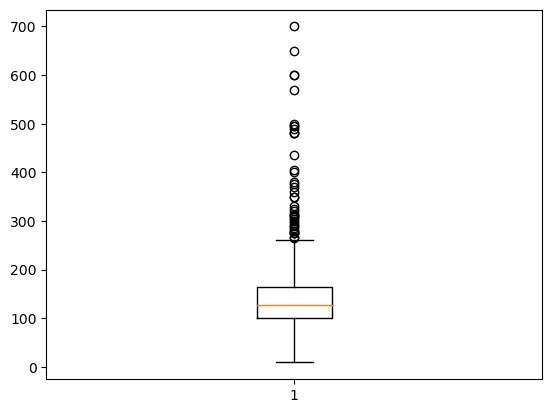

In [766]:
plt.boxplot(tt['LoanAmount'])
plt.show()

In [767]:
Q1=np.percentile(tt['LoanAmount'],25,method='midpoint')
Q2=np.percentile(tt['LoanAmount'],50,method='midpoint')
Q3=np.percentile(tt['LoanAmount'],75,method='midpoint')

print('Q1 is: ',Q1)
print('Q2 is: ',Q2)
print('Q3 is: ',Q3)

Q1 is:  100.5
Q2 is:  128.0
Q3 is:  164.5


In [768]:
IQR=Q3-Q1
print(IQR)

64.0


In [769]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('Lower value: ',low_lim)
print('Upper value: ',up_lim)

Lower value:  4.5
Upper value:  260.5


In [770]:
outliers=[]

for i in tt['LoanAmount']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)
        
print(outliers)        

[267.0, 349.0, 315.0, 320.0, 286.0, 312.0, 265.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]


In [771]:
tt['LoanAmount']=tt['LoanAmount'].clip(lower=low_lim,upper=up_lim)

In [772]:
outliers=[]

for i in tt['LoanAmount']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)
        
print(outliers) 

[]


In [773]:
tt

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [774]:
tt['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [775]:
tt['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

### Encoding the dataset using One Hot Encoding

In [776]:
tt_encoded=pd.get_dummies(tt.drop('Loan_Status',axis=1)).astype(int)
tt_encoded

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0,128,360,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508,128,360,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0,66,360,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358,120,360,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0,141,360,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0,71,360,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0,40,180,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240,253,360,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0,187,360,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


### Using Label encoding only on the target variable : Loan_Status

In [777]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [778]:
loan_status_encoded=le.fit_transform(tt['Loan_Status'])
encoded2=pd.DataFrame(loan_status_encoded)
encoded1=pd.DataFrame(tt_encoded)
encoded1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0,128,360,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508,128,360,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0,66,360,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358,120,360,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0,141,360,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0,71,360,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0,40,180,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240,253,360,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0,187,360,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [779]:
encoded2['Loan_Status']=encoded2[0]
encoded2

,0,Loan_Status
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
609,1,1
610,1,1
611,1,1
612,1,1


In [780]:
mat2=encoded2.drop(0,axis=1)
mat2

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [781]:
final_no_scaling=encoded1.join(mat2)
final_no_scaling

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0,128,360,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
1,4583,1508,128,360,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
2,3000,0,66,360,1,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,1
3,2583,2358,120,360,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,1
4,6000,0,141,360,1,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0,71,360,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,1
610,4106,0,40,180,1,0,1,0,1,0,...,0,1,1,0,1,0,1,0,0,1
611,8072,240,253,360,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,1
612,7583,0,187,360,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,1


### Performing MinMaxScaler on the dataset

In [782]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

### Given below is the final training dataset

In [783]:
tt_scaled=minmax.fit_transform(final_no_scaling)
final_train=pd.DataFrame(tt_scaled)
final_train

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.569558,0.000000,0.474104,0.743590,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.443034,0.263130,0.474104,0.743590,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.284829,0.000000,0.227092,0.743590,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.243154,0.411447,0.442231,0.743590,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.584649,0.000000,0.525896,0.743590,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.274835,0.000000,0.247012,0.743590,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
610,0.395363,0.000000,0.123506,0.358974,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
611,0.791725,0.041878,0.972112,0.743590,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
612,0.742854,0.000000,0.709163,0.743590,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


## TESTING DATA

In [784]:
test=pd.read_csv(r"C:\Users\johne\OneDrive\Desktop\Virtual Competition\test_lAUu6dG.csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [785]:
dd=test.copy()
dd.drop('Loan_ID',axis=1,inplace=True)

In [786]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


### Filling in the missing values using mode and median functions

In [787]:
dd['Gender'].value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

In [788]:
dd['Gender']=dd['Gender'].fillna('Male')
dd['Gender'].isna().sum()

0

In [789]:
dd['Dependents'].value_counts()

Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64

In [790]:
dd['Dependents']=dd['Dependents'].fillna('0')
dd['Dependents'].isna().sum()

0

In [791]:
dd['Self_Employed'].value_counts()

Self_Employed
No     307
Yes     37
Name: count, dtype: int64

In [792]:
dd['Self_Employed']=dd['Self_Employed'].fillna('No')
dd['Self_Employed'].isna().sum()

0

In [793]:
dd['LoanAmount'].skew()

2.223512207498288

In [794]:
dd['LoanAmount']=dd['LoanAmount'].fillna(dd['LoanAmount'].median())
dd['LoanAmount'].isna().sum()

0

In [795]:
dd['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64

In [796]:
dd['Loan_Amount_Term']=dd['Loan_Amount_Term'].fillna(360.0)
dd['Loan_Amount_Term'].isna().sum()

0

In [797]:
dd['Credit_History'].value_counts()

Credit_History
1.0    279
0.0     59
Name: count, dtype: int64

In [798]:
dd['Credit_History']=dd['Credit_History'].fillna(1.0)
dd['Credit_History'].isna().sum()

0

In [799]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


###  Viewing boxplots of various variables to find the outliers and then handling them using the clip method

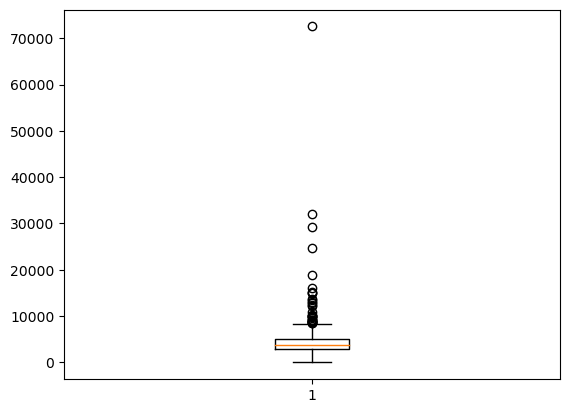

In [800]:
plt.boxplot(dd['ApplicantIncome'])
plt.show()

In [801]:
Q1=np.percentile(dd['ApplicantIncome'],25,method='midpoint')
Q2=np.percentile(dd['ApplicantIncome'],50,method='midpoint')
Q3=np.percentile(dd['ApplicantIncome'],75,method='midpoint')

print('Q1 is: ',Q1)
print('Q2 is: ',Q2)
print('Q3 is: ',Q3)

Q1 is:  2864.0
Q2 is:  3786.0
Q3 is:  5060.0


In [802]:
IQR=Q3-Q1
print(IQR)

2196.0


In [803]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('Lower value: ',low_lim)
print('Upper value: ',up_lim)

Lower value:  -430.0
Upper value:  8354.0


In [804]:
outliers=[]

for i in dd['ApplicantIncome']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)
        
print(outliers)        

[13633, 12173, 9226, 72529, 8449, 13518, 9719, 12500, 32000, 10890, 12941, 8703, 15312, 10166, 9167, 13083, 10000, 8706, 14911, 10000, 18840, 24797, 29167, 9000, 10000, 8750, 14987, 16000, 9699, 8667, 8550, 9200]


In [805]:
dd['ApplicantIncome']=dd['ApplicantIncome'].clip(lower=low_lim,upper=up_lim)

In [806]:
outliers=[]

for i in dd['ApplicantIncome']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)
        
print(outliers)    

[]


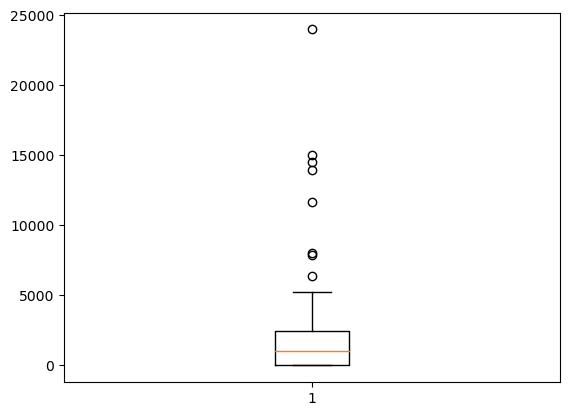

In [807]:
plt.boxplot(dd['CoapplicantIncome'])
plt.show()

In [808]:
Q1=np.percentile(dd['CoapplicantIncome'],25,method='midpoint')
Q2=np.percentile(dd['CoapplicantIncome'],50,method='midpoint')
Q3=np.percentile(dd['CoapplicantIncome'],75,method='midpoint')

print('Q1 is: ',Q1)
print('Q2 is: ',Q2)
print('Q3 is: ',Q3)

Q1 is:  0.0
Q2 is:  1025.0
Q3 is:  2430.5


In [809]:
IQR=Q3-Q1
print(IQR)

2430.5


In [810]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('Lower value: ',low_lim)
print('Upper value: ',up_lim)

Lower value:  -3645.75
Upper value:  6076.25


In [811]:
outliers=[]

for i in dd['CoapplicantIncome']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)
        
print(outliers)        

[7916, 24000, 8000, 6414, 14507, 13983, 11666, 15000]


In [812]:
dd['CoapplicantIncome']=dd['CoapplicantIncome'].clip(lower=low_lim,upper=up_lim)

In [813]:
outliers=[]

for i in dd['CoapplicantIncome']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)
        
print(outliers)     

[]


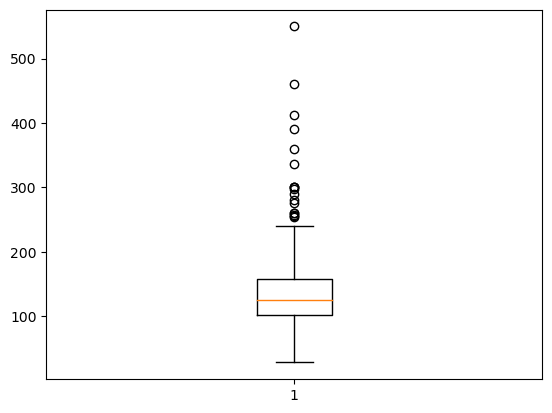

In [814]:
plt.boxplot(dd['LoanAmount'])
plt.show()

In [815]:
Q1=np.percentile(dd['LoanAmount'],25,method='midpoint')
Q2=np.percentile(dd['LoanAmount'],50,method='midpoint')
Q3=np.percentile(dd['LoanAmount'],75,method='midpoint')

print('Q1 is: ',Q1)
print('Q2 is: ',Q2)
print('Q3 is: ',Q3)

Q1 is:  101.0
Q2 is:  125.0
Q3 is:  157.5


In [816]:
IQR=Q3-Q1
print(IQR)

56.5


In [817]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('Lower value: ',low_lim)
print('Upper value: ',up_lim)

Lower value:  16.25
Upper value:  242.25


In [818]:
outliers=[]

for i in dd['LoanAmount']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)
        
print(outliers)        

[280.0, 300.0, 290.0, 275.0, 360.0, 257.0, 390.0, 256.0, 300.0, 550.0, 260.0, 336.0, 412.0, 460.0, 297.0, 300.0, 260.0, 254.0]


In [819]:
dd['LoanAmount']=dd['LoanAmount'].clip(lower=low_lim,upper=up_lim)

In [820]:
outliers=[]

for i in dd['LoanAmount']:
    if(i<low_lim) or (i>up_lim):
        outliers.append(i)
        
print(outliers) 

[]


### Performing one hot encoding on the dataset

In [821]:
dd=pd.get_dummies(dd).astype(int)
dd

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110,360,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126,360,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208,360,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100,360,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78,360,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113,360,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,115,360,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126,360,1,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158,360,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [822]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [823]:
dd

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110,360,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126,360,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208,360,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100,360,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78,360,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113,360,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,115,360,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126,360,1,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158,360,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


### Given below is the final testing dataset

In [824]:
dd_scaled=minmax.fit_transform(dd)
final_test=pd.DataFrame(dd_scaled)
final_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.684702,0.000000,0.383178,0.746835,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.368207,0.246873,0.457944,0.746835,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.598516,0.296248,0.841121,0.746835,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.280105,0.419026,0.336449,0.746835,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.392147,0.000000,0.233645,0.746835,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.479890,0.292462,0.397196,0.746835,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
363,0.497726,0.116689,0.406542,0.746835,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
364,0.389035,0.328012,0.457944,0.746835,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
365,0.598516,0.393845,0.607477,0.746835,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [825]:
y=final_train[20]
x=final_train.drop(20,axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=75,test_size=.597)

## Logistic Regression

In [826]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_model=log_reg.fit(x_train,y_train)
log_pred=log_model.predict(final_test)

In [827]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('Accuracy : ',accuracy_score(y_test,log_pred))
print('Precision : ',precision_score(y_test,log_pred))
print('Recall : ',recall_score(y_test,log_pred))
print('F1 : ',f1_score(y_test,log_pred))

Accuracy :  0.6321525885558583
Precision :  0.6895424836601307
Recall :  0.8406374501992032
F1 :  0.7576301615798924


In [828]:
b=pd.DataFrame(log_pred)
b.value_counts()

1.0    306
0.0     61
Name: count, dtype: int64

In [829]:
sample=pd.read_csv(r"C:\Users\johne\OneDrive\Desktop\Virtual Competition\sample_submission_49d68Cx.csv")
sample

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


## SVC

In [830]:
from sklearn.svm import SVC
svc=SVC()

In [831]:
svc_model=svc.fit(x_train,y_train)
svc_pred=svc_model.predict(final_test)

In [832]:
print(confusion_matrix(y_test,svc_pred))

[[ 21  95]
 [ 38 213]]


In [833]:
print('Accuracy : ',accuracy_score(y_test,svc_pred))
print('Precision : ',precision_score(y_test,svc_pred))
print('Recall : ',recall_score(y_test,svc_pred))
print('F1 : ',f1_score(y_test,svc_pred))

Accuracy :  0.6376021798365122
Precision :  0.6915584415584416
Recall :  0.848605577689243
F1 :  0.7620751341681575


In [834]:
final_pred2=pd.DataFrame(svc_pred)
final_pred2
final_pred2.value_counts()

1.0    308
0.0     59
Name: count, dtype: int64

In [835]:
final_ans2=final_pred2.replace((0.0,1.0),('No','Yes'))
final_ans2['Loan_Status']=final_ans2[0]
final_ans2.drop(0,axis=1,inplace=True)
sample['Loan_Status']=final_ans2['Loan_Status']
sample

,Loan_ID,Loan_Status
0,LP001015,Yes
1,LP001022,Yes
2,LP001031,Yes
3,LP001035,Yes
4,LP001051,Yes
...,...,...
362,LP002971,Yes
363,LP002975,Yes
364,LP002980,Yes
365,LP002986,Yes


In [836]:
sample['Loan_Status'].value_counts()

Loan_Status
Yes    308
No      59
Name: count, dtype: int64

In [837]:
sample.to_csv('without_outliers__scaled_svc_rs100.csv', index=False)

In [838]:
svc_lin=SVC(kernel='linear')

In [839]:
svc_model2=svc_lin.fit(x_train,y_train)
svc_pred2=svc_model2.predict(final_test)

In [840]:
print(confusion_matrix(y_test,svc_pred2))

[[ 21  95]
 [ 38 213]]


In [841]:
print('Accuracy : ',accuracy_score(y_test,svc_pred2))
print('Precision : ',precision_score(y_test,svc_pred2))
print('Recall : ',recall_score(y_test,svc_pred2))
print('F1 : ',f1_score(y_test,svc_pred2))

Accuracy :  0.6376021798365122
Precision :  0.6915584415584416
Recall :  0.848605577689243
F1 :  0.7620751341681575


In [842]:
svc_poly=SVC(kernel='poly')

In [843]:
svc_model3=svc_poly.fit(x_train,y_train)
svc_pred3=svc_model3.predict(final_test)

In [844]:
print(confusion_matrix(y_test,svc_pred3))

[[ 23  93]
 [ 39 212]]


In [845]:
print('Accuracy : ',accuracy_score(y_test,svc_pred3))
print('Precision : ',precision_score(y_test,svc_pred3))
print('Recall : ',recall_score(y_test,svc_pred3))
print('F1 : ',f1_score(y_test,svc_pred3))

Accuracy :  0.6403269754768393
Precision :  0.6950819672131148
Recall :  0.8446215139442231
F1 :  0.762589928057554


In [846]:
# So, the prediction values of the above model is :
final_pred=pd.DataFrame(svc_pred3)
final_pred

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
362,1.0
363,1.0
364,1.0
365,1.0


In [848]:
final_ans=final_pred.replace((0.0,1.0),('No','Yes'))
final_ans['Loan_Status']=final_ans[0]
final_ans.drop(0,axis=1,inplace=True)
sample['Loan_Status']=final_ans['Loan_Status']
sample

,Loan_ID,Loan_Status
0,LP001015,Yes
1,LP001022,Yes
2,LP001031,Yes
3,LP001035,Yes
4,LP001051,Yes
...,...,...
362,LP002971,Yes
363,LP002975,Yes
364,LP002980,Yes
365,LP002986,Yes


In [849]:
sample.to_csv('final.csv', index=False)

In [850]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [851]:
dtc_model=dtc.fit(x_train,y_train)
dtc_pred=dtc_model.predict(final_test)

In [852]:
print(confusion_matrix(y_test,dtc_pred))

[[ 37  79]
 [ 90 161]]


In [853]:
print('Accuracy : ',accuracy_score(y_test,dtc_pred))
print('Precision : ',precision_score(y_test,dtc_pred))
print('Recall : ',recall_score(y_test,dtc_pred))
print('F1 : ',f1_score(y_test,dtc_pred))

Accuracy :  0.5395095367847411
Precision :  0.6708333333333333
Recall :  0.6414342629482072
F1 :  0.6558044806517311


In [854]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [855]:
rfc_model=rfc.fit(x_train,y_train)
rfc_pred=rfc_model.predict(final_test)

In [856]:
print(confusion_matrix(y_test,rfc_pred))

[[ 24  92]
 [ 51 200]]


In [857]:
print('Accuracy : ',accuracy_score(y_test,rfc_pred))
print('Precision : ',precision_score(y_test,rfc_pred))
print('Recall : ',recall_score(y_test,rfc_pred))
print('F1 : ',f1_score(y_test,rfc_pred))

Accuracy :  0.6103542234332425
Precision :  0.684931506849315
Recall :  0.796812749003984
F1 :  0.736648250460405


In [858]:
rfc_2=RandomForestClassifier(n_estimators=75,max_depth=75,criterion='entropy',min_samples_split=3)
rfc_model2=rfc_2.fit(x_train,y_train)
rfc_pred2=rfc_model2.predict(final_test)

In [859]:
print('Accuracy : ',accuracy_score(y_test,rfc_pred2))
print('Precision : ',precision_score(y_test,rfc_pred2))
print('Recall : ',recall_score(y_test,rfc_pred2))
print('F1 : ',f1_score(y_test,rfc_pred2))

Accuracy :  0.6185286103542235
Precision :  0.68561872909699
Recall :  0.8167330677290837
F1 :  0.7454545454545455
